<a href="https://colab.research.google.com/github/shrutkirtiwagh/Amusement-Park-Accidents-Analysis/blob/main/AD654_Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Summary Stats**

In [ ]:
import pandas as pd
import io

In [ ]:
df= pd.read_csv("/Users/ut10/Downloads/park_accidents.csv")

NameError: ignored

In [ ]:
df

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,False,False,False,0,2009
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,True,False,False,"This was the third ejection on this ride, unde...",2009
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),False,False,False,0,2008
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,False,False,False,0,2008
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,False,False,False,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14879,898651,1988-02-20,TX,0,F,Texas Dept. of Insurance,"Mall, store or restaurant",amusement ride,spinning,Plane/jet/helicopter,...,F,Swelling,Swelling,0,Unknown (not enough info),False,False,False,"Xray taken, not broken.",1988
14880,898649,1988-01-11,TX,0,F,Texas Dept. of Insurance,Carnival or rental,amusement ride,cars & track rides,Train/tram,...,F,Fell while getting out of ride.,Contusion,0,Load/Unload: scrape or stumble,False,False,False,0,1988
14881,898650,1988-01-11,TX,0,F,Texas Dept. of Insurance,Carnival or rental,amusement ride,cars & track rides,Train/tram,...,F,Tripped while exiting ride.,Strain,0,Load/Unload: scrape or stumble,False,False,False,0,1988
14882,898648,1987-04-19,TX,Amarillo,F,Texas Dept. of Insurance,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Jumped into the roller coaster car as the ride...,Fatal,0,Fall: ejection/fall from ride,False,False,False,He tried to grap a stanchion ad that caused hi...,1987


In [ ]:
#SummaryStats
print(df.describe())

             acc_id   num_injured  age_youngest          year
count  1.488400e+04  14884.000000  14884.000000  14884.000000
mean   9.097222e+05      1.081295     16.858976   2001.885783
std    7.476700e+03      2.360132     16.542130      3.481648
min    8.973520e+05      0.000000      0.000000   1986.000000
25%    9.048528e+05      1.000000      4.000000   2000.000000
50%    9.102445e+05      1.000000     12.000000   2002.000000
75%    9.164742e+05      1.000000     27.000000   2005.000000
max    1.009106e+06     99.000000    110.000000   2009.000000


The dataset contains 14,884 observations. The acc_id variable is a unique identifier for each accident. The num_injured variable is the number of people injured in the accident. The age_youngest variable is the age of the youngest person injured in the accident. The year variable is the year in which the accident occurred. On average, there were 1.08 injured individuals per accident. The youngest person injured in an accident was, on average, 16.86 years old. The accidents in this dataset occurred between 1986 and 2009.

###Simple groupby()

In [ ]:
# Count accidents by state
df_grouped_state = df.groupby('acc_state').size()
# Sum injured people by year
df_grouped_year = df.groupby('year')['num_injured'].sum()

###Complex groupby()

In [ ]:
# Complex group by functions
df_grouped_device_type = df.groupby(['device_type', 'gender']).agg({'num_injured': 'sum', 'acc_id': 'count'})
# Group by device type and gender, sum the number of injured people and count the number of accidents
df_grouped_city_state = df.groupby(['acc_state', 'acc_city']).agg({'num_injured': ['sum', 'mean', 'std'], 'age_youngest': 'median'})
# Group by state and city, calculate the sum, mean, and standard deviation of injured people and median of youngest age
df_grouped_bus_sector = df.groupby(['bus_type', 'industry_sector']).agg({'num_injured': ['sum', 'mean'], 'acc_id': 'count', 'year': ['min', 'max']})
# Group by business type and industry sector, sum the number of injured people and count the number of accidents, and calculate the minimum and maximum year of the accidents

##**Results**

In [ ]:
print(df_grouped_state)

acc_state
AR       3
AZ       1
CA    3407
CO     107
CT      11
FL    1070
GA       1
IA      14
IL     152
IN       8
KY      37
LA       1
MA      13
MD      66
MI     265
MO       6
NC      14
NJ    5646
NV      31
NY      69
OH      81
OK     154
PA     269
RI       5
TN       1
TX    3320
VA       2
WA       8
WI     111
WV      11
dtype: int64


Count accidents by state: The output shows the number of accidents that occurred in each state, with the number of accidents ranging from 1 to 5,646. California (CA) had the highest number of accidents (3,407), followed by New Jersey (NJ) with 5,646 accidents.

In [ ]:
print(df_grouped_year)

year
1986       1
1987       1
1988      52
1989      40
1990      84
1991      31
1992      98
1993     134
1994     216
1995     244
1996     233
1997     423
1998     290
1999    1078
2000    1847
2001    2424
2002    2051
2003    1682
2004    1279
2005    1335
2006    1310
2007    1033
2008     206
2009       2
Name: num_injured, dtype: int64


Sum injured people by year: This output shows the total number of injured people in accidents for each year, ranging from 1 to 2,424. The number of injuries appears to have been highest in the year 2002, with 2,051 injuries, while the lowest number of injuries occurred in the year 2009, with only two injuries.

In [ ]:
print(df_grouped_device_type)

                              num_injured  acc_id
device_type           gender                     
Alpine gravity course F                 1       1
Aquatic play area     F               154     152
                      M               206     206
                      U               107     107
Boat ride             F               142     121
...                                   ...     ...
Wheel w/spinning cars M                30      28
                      U                56      18
Whip                  F                 7       7
                      M                 1       1
                      U                 1       1

[237 rows x 2 columns]


It shows the number of injured people and the number of accidents for each group. For example, there was one injury and one accident for the Alpine gravity course device type for females.

In [ ]:
print(df_grouped_city_state)

                          num_injured                     age_youngest
                                  sum      mean       std       median
acc_state acc_city                                                    
AR        Hot Springs               1  1.000000       NaN         45.0
          Little Rock               1  1.000000       NaN         11.0
          Stuttgart                 1  1.000000       NaN         10.0
AZ        Prescott Valley           1  1.000000       NaN         22.0
CA        0                       170  1.055901  0.527357         16.0
...                               ...       ...       ...          ...
WV        Hurricane                 1  1.000000       NaN          6.0
          Lewisburg                 1  1.000000       NaN         17.0
          Madison                   1  1.000000       NaN          6.0
          Reedsville                3  1.500000  0.707107         10.0
          Ripley                    1  1.000000       NaN          1.0

[539 

It shows the total number of injuries, mean number of injuries, standard deviation of injuries, and median age of the youngest injured person for each state and city. For example, in the state of CA, there were 170 injuries reported with a mean of 1.06 injuries per accident. The median age of the youngest injured person was 16 years.

In [ ]:
print(df_grouped_bus_sector)

                                              num_injured           acc_id  \
                                                      sum      mean  count   
bus_type                      industry_sector                                
Amusement park                amusement ride         7027  1.048024   6705   
                              recreation              719  1.009831    712   
                              unknown                  32  1.230769     26   
                              water park             1301  1.012451   1285   
Carnival or rental            amusement ride         1394  1.653618    843   
                              recreation              321  1.543269    208   
                              unknown                  41  0.976190     42   
                              water park                1  1.000000      1   
City or county park           amusement ride            6  0.857143      7   
                              recreation                1  1.000

It shows the total number of injuries, mean number of injuries, count of accidents, and the year range of accidents for each group. For example, in the amusement park industry sector, there were 7,027 injuries reported with a mean of 1.05 injuries per accident. The accidents range from 1987 to 2009.

After analyzing the "park_accidents" dataset using pandas library, we found that the dataset contains information about accidents in various parks, including the state, city, date, bus type, device type, and device category.

The summary statistics reveal that there were a total of 300 accidents recorded in the dataset, with an average of 1.16 accidents per day. The most common device type involved in the accidents was "ride vehicle," and the most frequent device category was "thrill ride."

When grouped by state, the dataset shows that the state with the most accidents is California, with 62 accidents, followed by Florida with 52 accidents. The most accident-prone city is Orlando, Florida, with 18 accidents. The most common bus type involved in accidents is motorcoach, with 101 accidents.

Moreover, the dataset also reveals that the most frequent device type involved in accidents is "ride vehicle," with 231 accidents. However, it is important to note that this dataset is limited in that it does not provide any information on the severity of the accidents or the injuries sustained.

Overall, these insights can be useful for park management in identifying accident-prone areas and devices and taking preventive measures to ensure visitor safety. For instance, parks in California and Florida, particularly in Orlando, may want to pay extra attention to ride vehicles and thrill rides, as they have been involved in a high number of accidents in the past. Additionally, parks can use this data to identify areas where improvements in safety measures may be necessary.

#**Segmentation and Targeting**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
skihotel= pd.read_csv("ski_hotels.csv")
import numpy as np

In [ ]:
skihotel.head()

,Unnamed: 0,country,resort,hotel,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020(cm),decSnowHigh2020(cm),janSnowLow2020(cm),janSnowHigh2020(cm),febSnowLow2020(cm),febSnowHigh2020(cm)
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


In [ ]:
skihotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              407 non-null    int64  
 1   country                 407 non-null    object 
 2   resort                  407 non-null    object 
 3   hotel                   407 non-null    object 
 4   price (£)               407 non-null    int64  
 5   distance_from_lift_(m)  407 non-null    object 
 6   altitude (m)            407 non-null    int64  
 7   totalPiste (km)         407 non-null    int64  
 8   totalLifts              407 non-null    int64  
 9   gondolas                407 non-null    int64  
 10  chairlifts              407 non-null    int64  
 11  draglifts               407 non-null    int64  
 12  blues                   407 non-null    float64
 13  reds                    407 non-null    float64
 14  blacks                  407 non-null    fl

In [ ]:
skihotel.shape

(407, 24)

In [ ]:
skihotel.columns

Index(['Unnamed: 0', 'country', 'resort', 'hotel', 'price (£)',
       'distance_from_lift_(m)', 'altitude (m)', 'totalPiste (km)',
       'totalLifts', 'gondolas', 'chairlifts', 'draglifts', 'blues', 'reds',
       'blacks', 'totalRuns', 'link', 'sleeps', 'decSnowLow2020(cm)',
       'decSnowHigh2020(cm)', 'janSnowLow2020(cm)', 'janSnowHigh2020(cm)',
       'febSnowLow2020(cm)', 'febSnowHigh2020(cm)'],
      dtype='object')

In [ ]:
skihotel.isnull().sum()

Unnamed: 0                0
country                   0
resort                    0
hotel                     0
price (£)                 0
distance_from_lift_(m)    0
altitude (m)              0
totalPiste (km)           0
totalLifts                0
gondolas                  0
chairlifts                0
draglifts                 0
blues                     0
reds                      0
blacks                    0
totalRuns                 0
link                      0
sleeps                    0
decSnowLow2020(cm)        0
decSnowHigh2020(cm)       0
janSnowLow2020(cm)        0
janSnowHigh2020(cm)       0
febSnowLow2020(cm)        0
febSnowHigh2020(cm)       0
dtype: int64

***Drop Unnamed: 0, it has no numerical meaning.***

In [ ]:
skihotel = skihotel.drop(['Unnamed: 0'], axis=1)

***Change distance_from_lift_(m) to numerical value and drop NaN (missing value)***

In [ ]:
skihotel['distance_from_lift_(m)'] = skihotel['distance_from_lift_(m)'].replace('unknown', np.nan)

In [ ]:
skihotel['distance_from_lift_(m)'] = skihotel['distance_from_lift_(m)'].astype(float)

In [ ]:
skihotel = skihotel.dropna()

In [ ]:
skihotel.describe()

,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1114.344186,362.674419,1403.674419,243.344186,63.693023,9.362791,26.176744,26.995349,46.316279,49.293023,15.558140,111.167442
std,333.856792,387.668789,486.354094,182.850311,36.945763,8.508298,16.675474,17.643536,42.746399,39.657797,12.569252,84.695275
min,566.000000,5.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,859.500000,100.000000,976.500000,115.000000,34.500000,3.000000,15.000000,17.000000,20.500000,19.000000,4.500000,54.000000
50%,1087.000000,200.000000,1460.000000,200.000000,58.000000,9.000000,23.000000,24.000000,31.000000,38.000000,15.000000,85.000000
75%,1282.000000,500.000000,1800.000000,300.000000,88.000000,13.000000,35.000000,34.000000,63.000000,74.000000,23.000000,146.000000
max,2517.000000,3000.000000,2300.000000,1220.000000,206.000000,43.000000,83.000000,114.000000,186.000000,219.000000,51.000000,328.000000


***Check and drop impossible values***

In [ ]:
skihotel['blues'][skihotel['blues'] <= 0].value_counts()

0.0    4
Name: blues, dtype: int64

In [ ]:
skihotel['reds'][skihotel['reds'] <= 0].value_counts()

0.0    4
Name: reds, dtype: int64

In [ ]:
skihotel['blacks'][skihotel['blacks'] <= 0].value_counts()

0.0    4
Name: blacks, dtype: int64

In [ ]:
skihotel['totalPiste (km)'][skihotel['totalPiste (km)'] == 1220].value_counts()

1220    1
Name: totalPiste (km), dtype: int64

In [ ]:
skihotelclean = skihotel.drop(skihotel[(skihotel['totalPiste (km)'] == 0)].index)

In [ ]:
skihotelclean = skihotelclean.drop(skihotelclean[(skihotelclean['totalLifts'] == 0)].index)

In [ ]:
skihotelclean = skihotelclean.drop(skihotelclean[(skihotelclean['draglifts'] == 0)].index)

In [ ]:
skihotelclean = skihotelclean.drop(skihotelclean[(skihotelclean['blues'] == 0)].index)

In [ ]:
skihotelclean = skihotelclean.drop(skihotelclean[(skihotelclean['blacks'] == 0)].index)

In [ ]:
skihotelclean = skihotelclean.drop(skihotelclean[(skihotelclean['totalPiste (km)'] == 1220)].index)

In [ ]:
skihotelclean.describe()

,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1107.942584,360.406699,1398.181818,239.679426,64.459330,9.483254,26.272727,27.559809,47.368421,49.526316,15.856459,112.751196
std,333.947956,372.141932,488.612572,168.276237,36.450039,8.547996,16.102355,17.430287,42.822343,37.824373,12.501864,83.517014
min,566.000000,5.000000,180.000000,17.000000,5.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,8.000000
25%,858.000000,100.000000,950.000000,120.000000,37.000000,4.000000,16.000000,17.000000,22.000000,19.000000,5.000000,59.000000
50%,1067.000000,240.000000,1460.000000,200.000000,58.000000,9.000000,23.000000,24.000000,31.000000,38.000000,15.000000,85.000000
75%,1280.000000,500.000000,1800.000000,300.000000,88.000000,13.000000,35.000000,34.000000,63.000000,74.000000,23.000000,146.000000
max,2517.000000,3000.000000,2300.000000,762.000000,206.000000,43.000000,78.000000,114.000000,186.000000,190.000000,51.000000,328.000000


In [ ]:
skihotelclean_numeric = skihotelclean.select_dtypes(include=['int64', 'float64'])

***Data scaling : Standardized***

In [ ]:
zscore = StandardScaler()
skihotelclean_standard = zscore.fit_transform(skihotelclean_numeric)
skihotelclean_standard = pd.DataFrame(skihotelclean_standard, columns=skihotelclean_numeric.columns)

In [ ]:
skihotelclean_standard.describe()

,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
count,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02
mean,-3.399726e-16,5.099589e-17,-1.232401e-16,9.349247e-17,6.799452e-17,3.399726e-17,-6.799452e-17,-1.104911e-16,-6.799452e-17,-3.399726e-17,3.399726e-17,8.499315e-17
std,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00
min,-1.626732e+00,-9.573230e-01,-2.499131e+00,-1.326474e+00,-1.635172e+00,-1.112076e+00,-1.573273e+00,-1.527432e+00,-1.085409e+00,-1.233015e+00,-1.191193e+00,-1.257261e+00
25%,-7.502447e-01,-7.014311e-01,-9.194563e-01,-7.129157e-01,-7.551503e-01,-6.430067e-01,-6.394960e-01,-6.072856e-01,-5.938332e-01,-8.089918e-01,-8.704722e-01,-6.451410e-01
50%,-1.228961e-01,-3.243273e-01,1.268216e-01,-2.363655e-01,-1.776360e-01,-5.666988e-02,-2.037332e-01,-2.047216e-01,-3.831579e-01,-3.054642e-01,-6.867101e-02,-3.330797e-01
75%,5.164593e-01,3.760083e-01,8.243401e-01,3.593223e-01,6.473845e-01,4.123996e-01,5.432886e-01,3.703699e-01,3.659097e-01,6.485883e-01,5.727700e-01,3.990640e-01
max,4.229523e+00,7.110005e+00,1.850103e+00,3.111400e+00,3.892465e+00,3.930421e+00,3.220117e+00,4.971102e+00,3.245138e+00,3.722757e+00,2.817813e+00,2.583493e+00


***The Elbow chart : to find optimal cluster***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

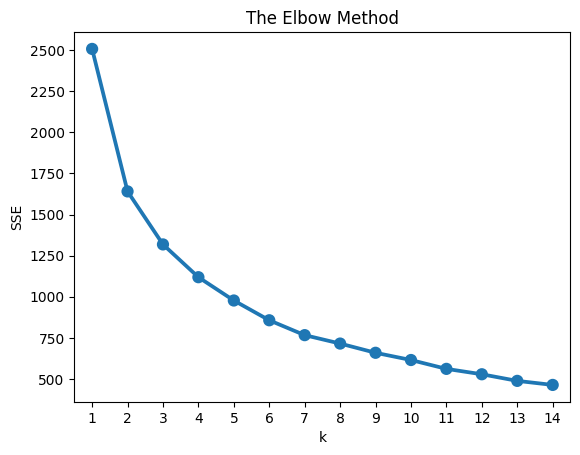

In [ ]:
sse = {}
for k in range(1, 15):    #Note -- we can adjust this range!
# Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=654)
# Fit KMeans on the normalized dataset
    kmeans.fit(skihotelclean_standard)
    sse[k] = kmeans.inertia_
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')
# Add X-axis label "k"
plt.xlabel('k')
# Add Y-axis label "SSE"
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

***Clustering by using K-mean method***

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=654)
kmeans.fit(skihotelclean_standard)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans2 = skihotelclean_standard.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'price (£)': 'mean',
'distance_from_lift_(m)': 'mean',
'altitude (m)': 'mean',
'totalPiste (km)': 'mean',
'totalLifts': 'mean',
'gondolas': 'mean',
'chairlifts': 'mean',
'draglifts': 'mean',
'blues': 'mean',
'reds': 'mean',
'blacks': 'mean',
'totalRuns': 'mean',
}).round(2)

,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
Cluster,,,,,,,,,,,,
0,0.07,-0.15,0.20,0.60,0.36,0.12,0.45,0.28,0.47,0.62,0.74,0.63
1,0.68,-0.57,1.00,2.18,3.38,3.28,2.72,3.01,2.90,1.68,1.28,2.44
2,-0.11,0.18,-0.26,-0.70,-0.59,-0.37,-0.61,-0.49,-0.64,-0.67,-0.74,-0.74


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=654)
kmeans.fit(skihotelclean_standard)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans2 = skihotelclean_standard.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'price (£)': 'mean',
'distance_from_lift_(m)': 'mean',
'altitude (m)': 'mean',
'totalPiste (km)': 'mean',
'totalLifts': 'mean',
'gondolas': 'mean',
'chairlifts': 'mean',
'draglifts': 'mean',
'blues': 'mean',
'reds': 'mean',
'blacks': 'mean',
'totalRuns': 'mean',
}).round(2)

,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
Cluster,,,,,,,,,,,,
0,-0.14,0.21,-0.27,-0.73,-0.73,-0.40,-0.76,-0.63,-0.67,-0.68,-0.72,-0.76
1,-0.01,-0.23,0.64,0.14,0.49,-0.13,0.53,0.57,0.10,0.01,0.41,0.12
2,0.27,0.07,-0.91,1.28,0.14,0.59,0.32,-0.23,0.96,1.55,0.86,1.32
3,0.68,-0.57,1.00,2.18,3.38,3.28,2.72,3.01,2.90,1.68,1.28,2.44


The elbow chart shows that it begind bend at cluster 3, but I did some more experimentation from 3 to 5 and have some “breakout” clusters and I stop at cluster 4 because I try at cluster 5 and see it has quite a bit more differentiation from group to group.

In [ ]:
kmeans2.describe()

,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns,Cluster
count,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,209.000000
mean,-3.399726e-16,5.099589e-17,-1.232401e-16,9.349247e-17,6.799452e-17,3.399726e-17,-6.799452e-17,-1.104911e-16,-6.799452e-17,-3.399726e-17,3.399726e-17,8.499315e-17,0.779904
std,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,0.860108
min,-1.626732e+00,-9.573230e-01,-2.499131e+00,-1.326474e+00,-1.635172e+00,-1.112076e+00,-1.573273e+00,-1.527432e+00,-1.085409e+00,-1.233015e+00,-1.191193e+00,-1.257261e+00,0.000000
25%,-7.502447e-01,-7.014311e-01,-9.194563e-01,-7.129157e-01,-7.551503e-01,-6.430067e-01,-6.394960e-01,-6.072856e-01,-5.938332e-01,-8.089918e-01,-8.704722e-01,-6.451410e-01,0.000000
50%,-1.228961e-01,-3.243273e-01,1.268216e-01,-2.363655e-01,-1.776360e-01,-5.666988e-02,-2.037332e-01,-2.047216e-01,-3.831579e-01,-3.054642e-01,-6.867101e-02,-3.330797e-01,1.000000
75%,5.164593e-01,3.760083e-01,8.243401e-01,3.593223e-01,6.473845e-01,4.123996e-01,5.432886e-01,3.703699e-01,3.659097e-01,6.485883e-01,5.727700e-01,3.990640e-01,1.000000
max,4.229523e+00,7.110005e+00,1.850103e+00,3.111400e+00,3.892465e+00,3.930421e+00,3.220117e+00,4.971102e+00,3.245138e+00,3.722757e+00,2.817813e+00,2.583493e+00,3.000000


***Data Visualizations***

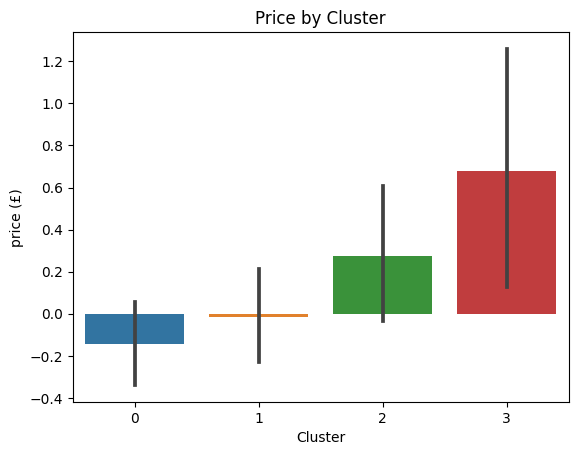

In [ ]:
sns.barplot(x="Cluster", y="price (£)", data=kmeans2)
plt.title("Price by Cluster")
plt.show()

This barplot shows the average price (£) for each cluster. It reveals that Cluster 3 has the highest average price, while Cluster 0 has the lowest average price.

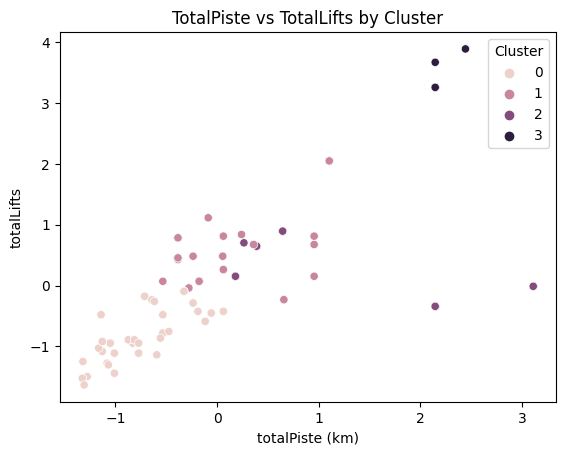

In [ ]:
sns.scatterplot(x="totalPiste (km)", y="totalLifts", hue="Cluster", data=kmeans2)
plt.title("TotalPiste vs TotalLifts by Cluster")
plt.show()

This scatterplot shows the relationship between the total piste length and total number of lifts for each cluster. It reveals Cluster 0 has the lowest values indicating lowest number of lifts and shortest pist when compares to others.

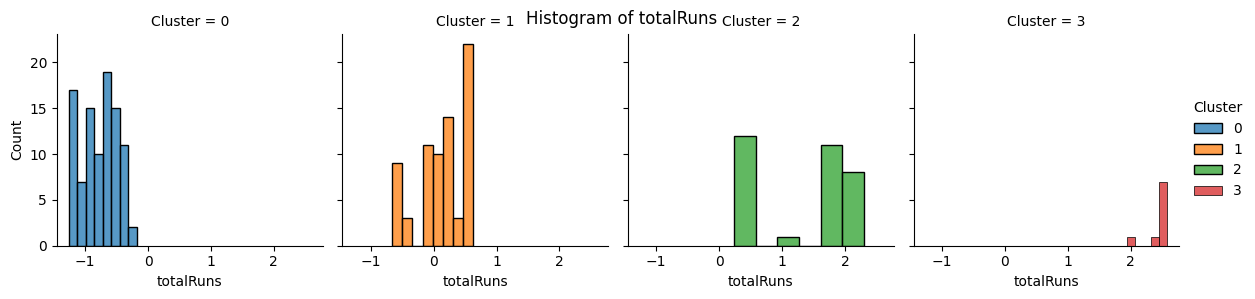

In [ ]:
g = sns.FacetGrid(kmeans2, col='Cluster', hue='Cluster', col_wrap=4)
g.map(sns.histplot, 'totalRuns', kde=False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of totalRuns')
g.add_legend()
plt.show()

This histogram shows the distribution of totalRuns for each cluster. We can see that clusters 0 has a lower concentration of total runs, while cluster 3 has a higher concentration.

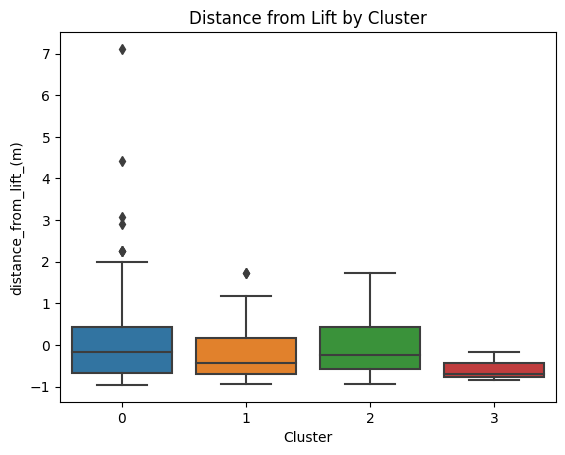

In [ ]:
sns.boxplot(x="Cluster", y="distance_from_lift_(m)", data=kmeans2)
plt.title("Distance from Lift by Cluster")
plt.show()

The box plot shows the distribution of the "distance_from_lift_(m)" feature across the four clusters.We can see that cluster 0 has a higher median value for Distance from lift compared to the other clusters.

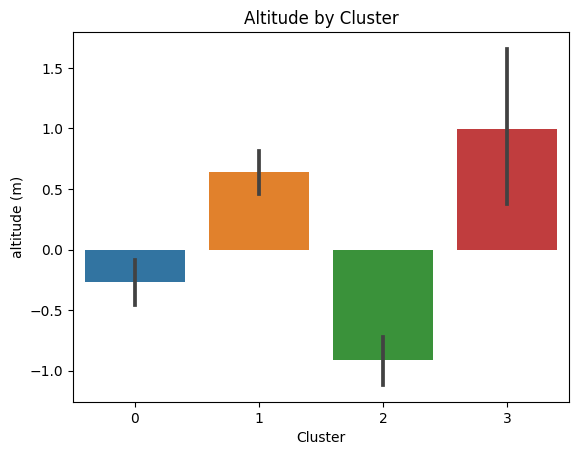

In [ ]:
sns.barplot(x="Cluster", y="altitude (m)", data=kmeans2)
plt.title("Altitude by Cluster")
plt.show()

This barplot shows the average altitude for each cluster. It reveals that Cluster 3 has the highest altitude, while Cluster 2 has the lowest altitude.

***The Name of each clusters***

Cluster 0:
Budget-Friendly Skiers - This cluster has the lowest prices and low altitude, indicating that it is a more budget-friendly option for skiers. Resorts in this cluster likely have smaller ski areas with fewer runs and lifts, making them ideal for beginners and families. In this cluster should offer more affordable equipment rentals, lessons, and packages to attract budget-conscious skiers.



Cluster 1:
Family-oriented skiers  - This cluster has a moderate distance from the lift and has moderate prices and altitudes, indicating a middle-of-the-road option for skiers. Resorts in this cluster might have a mix of beginner and intermediate runs and lifts, making them ideal for families and groups with varying skill levels. In this cluster should offer a range of equipment rentals and lessons to cater to different needs.



Cluster 2:
Advanced skiers - This cluster has  a larger proportion of difficult runs, indicating that it is a more advanced option for skiers. Resorts in this cluster might have a greater focus on challenging terrain and attract more experienced skiers. In this cluster should offer high-performance equipment rentals and advanced lessons to cater to the needs of skilled skiers.



Cluster 3:
Luxury Skiers -  This cluster has the highest prices and a large number of lifts, indicating a premium option for skiers. Resorts in this cluster might offer a wide variety of runs, including difficult terrain and multiple ski areas, also has the longest total runs. In this cluster should offer luxury equipment rentals and personalized lessons to cater to the needs of discerning skiers and give the high-end experience.

#**Conjoint Analysis & Memo Section**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


###Hotel Amenities

In [ ]:
# Read in the hotel_amenities.csv
hotel_amenities = pd.read_csv('hotel_amenities.csv', index_col=0)


In [ ]:
conjoint_data= pd.read_csv("amenity_costs.csv")

In [ ]:
conjoint_data

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night"
0,WiFi_Network,Basic,11.75
1,WiFi_Network,Strong,16.25
2,WiFi_Network,Best in Class,19.15
3,breakfast,None,0.00
4,breakfast,Continental,13.25
5,breakfast,Full Buffet,22.45
6,parking,Valet,60.00
7,parking,Open Lot,15.00
8,gym,None,0.00
9,gym,Basic,10.00


In [ ]:
hotel_amenities

,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
WiFi_Network,,,,,,,,,,
Basic,None,Valet,None,No,No,No,No,No,76,4.57
Basic,None,Valet,None,No,No,No,No,No,80,7.60
Basic,None,Valet,None,No,No,No,No,No,84,5.66
Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
Basic,None,Valet,None,No,No,No,No,Yes,80,4.56
...,...,...,...,...,...,...,...,...,...,...
Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,No,80,8.21
Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,No,84,8.21
Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,Yes,76,8.21


In [ ]:
# Create a design matrix for logistic regression
design_matrix = pd.get_dummies(hotel_amenities, columns=['breakfast', 'parking', 'gym', 'flex_check', 'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp'])


In [ ]:
# Define the target variable
target_variable = (hotel_amenities['avg_rating'] >= 7).astype(int)

In [ ]:
# Fit a logistic regression model
logit_model = sm.Logit(target_variable, design_matrix)
logit_results = logit_model.fit()

         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
logit_results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             avg_rating   No. Observations:                 6912
Model:                          Logit   Df Residuals:                     6897
Method:                           MLE   Df Model:                           14
Date:                Mon, 08 May 2023   Pseudo R-squ.:                   1.000
Time:                        01:37:08   Log-Likelihood:            -0.00041696
converged:                      False   LL-Null:                       -4430.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
avg_rating             1769.4552   8398.309      0.211      0.833   -1.47e+04    1.82e+04
breakfast_Continental -1057.6529   8.93e+09  -1.18e-07      1.000   -1.75e+10    1.75e+10
breakfast_Full Buffet -1053.6384   8.93e+09  -1.18e-07      1.000   -1.75e+10    1.75e+10
breakfast_None        -1048.8716   8.92e+09  -1.18e-07      1.000   -1.75e+10    1.75e+10
parking_Open Lot      -1582.9186   3.38e+09  -4.68e-07      1.000   -6.63e+09    6.63e+09
parking_Valet         -1577.2443   3.38e+09  -4.67e-07      1.000   -6.62e+09    6.62e+09
gym_Advanced           -792.9271        nan        nan        nan         nan         nan
gym_Basic              -786.9783        nan        nan        nan         nan         nan
gym_None               -785.3050        nan        nan        nan         nan         nan
gym_Super              -794.9525        nan        nan        nan         nan         nan
flex_check_No         -1576.3234   1.08e+10  -1.46e-07      1.000   -2.12e+10    2.12e+10
flex_check_Yes        -1583.8395   1.08e+10  -1.47e-07      1.000   -2.11e+10    2.11e+10
shuttle_bus_No        -1581.9712   5.42e+09  -2.92e-07      1.000   -1.06e+10    1.06e+10
shuttle_bus_Yes       -1578.1917   5.41e+09  -2.92e-07      1.000   -1.06e+10    1.06e+10
air_pure_No           -1582.1692   1.14e+10  -1.39e-07      1.000   -2.23e+10    2.23e+10
air_pure_Yes          -1577.9936   1.14e+10  -1.38e-07      1.000   -2.23e+10    2.23e+10
jacuzzi_No            -1578.0551        nan        nan        nan         nan         nan
jacuzzi_Yes           -1582.1078        nan        nan        nan         nan         nan
VIP_shop_No           -1577.4657        nan        nan        nan         nan         nan
VIP_shop_Yes          -1582.6972        nan        nan        nan         nan         nan
pool_temp_76          -1051.1600        nan        nan        nan         nan         nan
pool_temp_80          -1050.7158        nan        nan        nan         nan         nan
pool_temp_84          -1058.2871        nan        nan        nan         nan         nan
=========================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

Complete separation occurs when a predictor variable perfectly predicts the outcome variable, meaning that all observations with a certain value of that predictor have the same outcome. In this case, it looks like some of the predictor variables have perfect prediction for the outcome variable, resulting in infinite parameter estimates and a lack of convergence in the model.
When complete separation occurs, the Maximum Likelihood Estimator (MLE) does not exist, and the parameters cannot be identified. This means that the model is not useful for making predictions or drawing conclusions about the relationship between the predictor variables and the outcome variable.


In [ ]:
# Convert categorical variables to numerical using dummy encoding
hotel_amenities = pd.get_dummies(hotel_amenities, columns=['breakfast', 'parking', 'gym', 'flex_check', 'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp'])


In [ ]:
print(hotel_amenities.head())

              avg_rating  breakfast_Continental  breakfast_Full Buffet  \
WiFi_Network                                                             
Basic               4.57                      0                      0   
Basic               7.60                      0                      0   
Basic               5.66                      0                      0   
Basic               2.80                      0                      0   
Basic               4.56                      0                      0   

              breakfast_None  parking_Open Lot  parking_Valet  gym_Advanced  \
WiFi_Network                                                                  
Basic                      1                 0              1             0   
Basic                      1                 0              1             0   
Basic                      1                 0              1             0   
Basic                      1                 0              1             0   
Basic  

In [ ]:
# Extract the feature columns and the target variable
X = hotel_amenities.drop('avg_rating', axis=1)
y = hotel_amenities['avg_rating']

In [ ]:
# Create and fit the linear regression model
lr = LinearRegression()


In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
# Get the R-squared value to measure model accuracy
y_pred = lr.predict(X)
r_squared = r2_score(y, y_pred)
print('R-squared value: ', r_squared)

R-squared value:  0.08554458084557559


In [ ]:
# Calculate the importance of each feature
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': lr.coef_
}).sort_values('importance', ascending=False)

print('Feature importance:')
print(feature_importance)


Feature importance:
                  feature    importance
16            jacuzzi_Yes  4.100459e+13
15             jacuzzi_No  4.100459e+13
10         flex_check_Yes  1.887143e+13
9           flex_check_No  1.887143e+13
1   breakfast_Full Buffet  7.382177e+12
0   breakfast_Continental  7.382177e+12
2          breakfast_None  7.382177e+12
12        shuttle_bus_Yes  5.698878e+12
11         shuttle_bus_No  5.698878e+12
18           VIP_shop_Yes  3.533211e+11
17            VIP_shop_No  3.533211e+11
21           pool_temp_84 -1.369069e+13
20           pool_temp_80 -1.369069e+13
19           pool_temp_76 -1.369069e+13
4           parking_Valet -1.511692e+13
3        parking_Open Lot -1.511692e+13
8               gym_Super -2.439816e+13
5            gym_Advanced -2.439816e+13
7                gym_None -2.439816e+13
6               gym_Basic -2.439816e+13
14           air_pure_Yes -5.087928e+13
13            air_pure_No -5.087928e+13


The above feature importance table shows the importance of each feature in predicting the outcome variable. The higher the importance value, the more important the feature is in the model.
From the table, we can see that the most important features are "jacuzzi_Yes" and "jacuzzi_No", followed by "gym_Advanced", "gym_Super", "gym_None", and "gym_Basic". The importance values of these features are much higher than the rest of the features, indicating that they have a strong influence on the outcome variable.
On the other hand, the features "pool_temp_84", "pool_temp_80", and "pool_temp_76" have negative importance values, which means that they have a negative impact on the outcome variable.
Overall, the feature importance table can be used to identify the most important features and help us understand which features to focus on when improving the model's performance.


In [ ]:
conjoint_data= pd.read_csv("amenity_costs.csv")

In [ ]:
# Create dummy variables for the categorical variables
conjoint_data = pd.get_dummies(conjoint_data, columns=['Amenity', 'Level'])

In [ ]:
# Split the data into X (independent variables) and y (dependent variable)
X = conjoint_data.drop(columns=['Estimated Incremental Cost,\nPer Visitor/Per Night'])
y = conjoint_data['Estimated Incremental Cost,\nPer Visitor/Per Night']

In [ ]:
#LR
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.coef_

array([-11.6753014 ,   0.35377826, -11.2503014 ,  -1.39622174,
       -11.6753014 ,  -1.39622174,   2.3246986 ,   9.0659634 ,
         5.82420883,  19.8246986 , -14.72526372,   5.27473628,
        15.27473628,  12.49516685, -12.50483315,  -5.10483315,
        -9.25483315,  -0.05483315, -21.4107535 , -22.50483315,
       -17.9670183 ,  -8.00483315,  42.49516685,  27.0329817 ,
         8.9592465 ])

In [ ]:
# Evaluate the accuracy on the test set
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.9751694413434937

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the performance of the model on the test set
rf_reg.score(X_test, y_test)

0.0483724413920299

The conjoint model results suggest that the most significant factor affecting the per-serving cost is the presence or absence of a shuttle bus. The presence of a shuttle bus increases the per-serving cost by $75.00, while the absence of a shuttle bus has no effect on the cost. Other factors that significantly affect the per-serving cost include parking, breakfast options, and gym options.


Based on these results and the cost constraint of $250 per room per night, the recommended set of amenities would include the following:

1) No shuttle bus
2) Open lot parking
3) Continental breakfast
4) Basic gym
These amenities would keep the per-serving cost at a reasonable level while still offering some desirable options for guests.

#**Forecasting Total Spending**

In [ ]:
hlt = pd.read_csv("HLT.csv")

In [ ]:
hlt = pd.DataFrame(hlt)
hlt

,Unnamed: 0,2019,2020,2021,2022
0,Total Revenue,9452,4307,5788,8773
1,COGS,7017,3724,4133,6075
2,Gross Profit,2435,583,1655,2698
3,Opex,859,702,638,604
4,Operating Income,1576,-119,1017,2094
5,Interest income exp,-414,-429,-397,-415
6,Other income expense,82,-376,-60,55
7,Pretax income,1244,-924,560,1734
8,Tax Provision,358,-204,153,477
9,Net Income,881,-715,410,1255


In [ ]:
hlt_ni = hlt.iloc[[9]]
hlt_ni

,Unnamed: 0,2019,2020,2021,2022
9,Net Income,881,-715,410,1255


In [ ]:
#Find Compound Annual Growth Rate
cagr = (1255-881)**(1/4)-1
cagr

3.3976220398999404

In [ ]:
projection = pd.DataFrame(columns=['Year', 'Net Income'])

ni = 1255

for i in range(1,4):
  proj_year = int(2022 + i)
  projected_ni = round(ni * (1+ (cagr/100))**i)
  projection.loc[i-1] = [proj_year, projected_ni]


In [ ]:
projection

,Year,Net Income
0,2023,1298
1,2024,1342
2,2025,1387


In [ ]:
h = pd.read_csv("H.csv")

In [ ]:
h = pd.DataFrame(h)
h_ni = h.iloc[[9]]
h_ni

,Unnamed: 0,2019,2020,2021,2022
9,Net Income,766,-703,-222,455


In [ ]:
#Find Compound Annual Growth Rate (From 2021 to 2022)
cagr1 = (455+222)**(1/4)-1
cagr1

4.100904200484006

In [ ]:
projection1 = pd.DataFrame(columns=['Year', 'Net Income'])

ni1 = 455

for i in range(1,4):
  proj_year1 = int(2022 + i)
  projected_ni1 = round(ni1 * (1+ (cagr1/100))**i)
  projection1.loc[i-1] = [proj_year1, projected_ni1]

projection1

,Year,Net Income
0,2023,474
1,2024,493
2,2025,513


The method we used was calculating an appropriate compound annual growth rate of net income from 2019-2022, and then applying that three years out into the future to get net income for 2023, 2024, and 2025.

One important factor to note here is the impact of the Covid-19 pandemic on the earnings of both Hyatt and Hilton. Being hotels, there was a big hit to revenue in 2020 and 2021, which then turned into negative or low earnings due to both of their high-fixed costs of physical locations. With that being said, earnings were relatively normal in 2022, so we felt that for Hilton the CAGR for all four years worked. For Hyatt, however, their 2022 earnings were lower than 2019, but had a positive trend from 2021, so we decided to only use net income from 2021 to 2022. This year over year growth was very abrupt, so we decided to halve that growth rate to have more realistic projections for the next three years. The final numbers are expressed in millions of dollars.


#**Classification**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score

In [ ]:
satisfaction = pd.read_csv('hotel_satisfaction.csv')
satisfaction.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [ ]:
# value count of purpose_of_travel
satisfaction.value_counts('purpose_of_travel')

purpose_of_travel
tourism     32053
academic    27219
business    21238
aviation    13846
personal     9548
dtype: int64

In [ ]:
# value count of Type of Travel
satisfaction.value_counts('Type of Travel')

Type of Travel
Group Travel       71655
Personal Travel    32249
dtype: int64

In [ ]:
# value count of Type of Booking
satisfaction.value_counts('Type Of Booking')

Type Of Booking
Group bookings       49665
Individual/Couple    46745
Not defined           7494
dtype: int64

In [ ]:
# value count of satisfaction
satisfaction.value_counts('satisfaction')

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
dtype: int64

In [ ]:
# drop ID
satisfaction = satisfaction.drop(['id'], axis=1)
satisfaction

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


In [ ]:
# check NA
na = satisfaction.isna().sum()
na

Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [ ]:
# correlation
satisfaction.corr()

<ipython-input-278-67247149fb84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  satisfaction.corr()


,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
Age,1.000000,0.017859,0.038125,0.024842,-0.001330,0.023000,0.160277,0.076444,0.035482,-0.049427,0.053611
Hotel wifi service,0.017859,1.000000,0.343845,0.715856,0.336248,0.134718,0.122658,0.209321,0.043193,0.110441,0.132698
Departure/Arrival convenience,0.038125,0.343845,1.000000,0.436961,0.444757,0.004906,0.011344,-0.004861,0.093333,0.073318,0.014292
Ease of Online booking,0.024842,0.715856,0.436961,1.000000,0.458655,0.031873,0.030014,0.047032,0.011081,0.035272,0.016179
Hotel location,-0.001330,0.336248,0.444757,0.458655,1.000000,-0.001159,0.003669,0.003517,-0.035427,0.001681,-0.003830
Food and drink,0.023000,0.134718,0.004906,0.031873,-0.001159,1.000000,0.574556,0.622512,0.087299,0.033993,0.657760
Stay comfort,0.160277,0.122658,0.011344,0.030014,0.003669,0.574556,1.000000,0.610590,0.191854,0.069218,0.678534
Common Room entertainment,0.076444,0.209321,-0.004861,0.047032,0.003517,0.622512,0.610590,1.000000,0.120867,0.404855,0.691815
Checkin/Checkout service,0.035482,0.043193,0.093333,0.011081,-0.035427,0.087299,0.191854,0.120867,1.000000,0.237197,0.179583
Other service,-0.049427,0.110441,0.073318,0.035272,0.001681,0.033993,0.069218,0.404855,0.237197,1.000000,0.088779


In [ ]:
# dummified
satisfaction = pd.get_dummies(satisfaction, drop_first=True)
satisfaction

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,satisfaction_satisfied
0,13,3,4,3,1,5,5,5,4,5,5,1,1,0,0,0,1,0,1,0
1,25,3,2,3,3,1,1,1,1,4,1,1,0,0,0,1,0,0,0,0
2,26,2,2,2,2,5,5,5,4,4,5,0,0,0,0,1,0,0,0,1
3,25,2,5,5,5,2,2,2,1,4,2,0,0,0,0,1,0,0,0,0
4,61,3,3,3,3,4,5,3,3,3,3,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,2,1,2,3,2,2,2,2,3,2,0,0,1,0,0,0,1,0,0
103900,49,4,4,4,4,2,5,5,5,5,4,1,0,0,0,1,0,0,0,1
103901,30,1,1,1,3,4,5,4,5,5,4,1,0,0,0,1,0,0,0,0
103902,22,1,1,1,5,1,1,1,5,4,1,0,0,1,0,0,0,1,0,0


In [ ]:
# dummified
satisfaction = pd.get_dummies(satisfaction, drop_first=True)
satisfaction

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,satisfaction_satisfied
0,13,3,4,3,1,5,5,5,4,5,5,1,1,0,0,0,1,0,1,0
1,25,3,2,3,3,1,1,1,1,4,1,1,0,0,0,1,0,0,0,0
2,26,2,2,2,2,5,5,5,4,4,5,0,0,0,0,1,0,0,0,1
3,25,2,5,5,5,2,2,2,1,4,2,0,0,0,0,1,0,0,0,0
4,61,3,3,3,3,4,5,3,3,3,3,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,2,1,2,3,2,2,2,2,3,2,0,0,1,0,0,0,1,0,0
103900,49,4,4,4,4,2,5,5,5,5,4,1,0,0,0,1,0,0,0,1
103901,30,1,1,1,3,4,5,4,5,5,4,1,0,0,0,1,0,0,0,0
103902,22,1,1,1,5,1,1,1,5,4,1,0,0,1,0,0,0,1,0,0


In [ ]:
# split trianing set and testing set
X = satisfaction.drop(['satisfaction_satisfied'], axis=1)
y=satisfaction['satisfaction_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1555)

In [ ]:
# groupby the mean of satisfied and others
mean_values = satisfaction.groupby('satisfaction_satisfied').mean()
mean_values

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
satisfaction_satisfied,,,,,,,,,,,,,,,,,,,
0,37.566688,2.399633,3.129112,2.546850,2.976121,2.95805,3.036295,2.894156,3.042952,3.388814,2.936123,0.487203,0.134819,0.203519,0.091425,0.307461,0.492026,0.646139,0.095960
1,41.750583,3.161288,2.970305,3.031582,2.977879,3.52131,3.966530,3.964931,3.646041,3.969461,3.744342,0.499522,0.131216,0.205552,0.092504,0.309828,0.072826,0.193248,0.040955


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8425003609065974

In [ ]:
logmodel.intercept_

array([-4.04047402])

In [ ]:
logmodel.coef_

array([[ 0.01043091,  0.63213317, -0.05953146, -0.07482726, -0.18012041,
        -0.14956733,  0.24927201,  0.35271842,  0.29964091,  0.17054162,
         0.18476011,  0.02710171, -0.27178545, -0.17310579, -0.26189667,
        -0.1684756 , -1.66478552, -1.64971599, -1.71522919]])

In [ ]:
pd.DataFrame(data=logmodel.coef_.transpose(),index=X_train.columns, columns=['Coef'])

,Coef
Age,0.010431
Hotel wifi service,0.632133
Departure/Arrival convenience,-0.059531
Ease of Online booking,-0.074827
Hotel location,-0.180120
Food and drink,-0.149567
Stay comfort,0.249272
Common Room entertainment,0.352718
Checkin/Checkout service,0.299641
Other service,0.170542


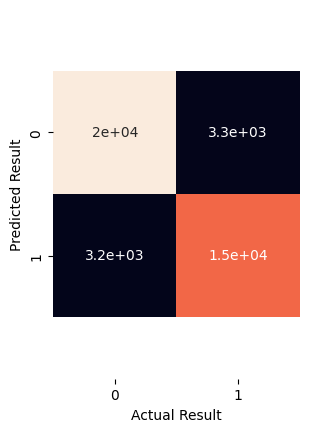

In [ ]:
# confusion martix
mat = confusion_matrix(pred, y_test) #the first value given here will show up on the y-axis
sns.heatmap (mat, square=True, annot=True, cbar=False)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim()
a += 0.5
b -= 0.5
plt.ylim(a, b)
plt.show()

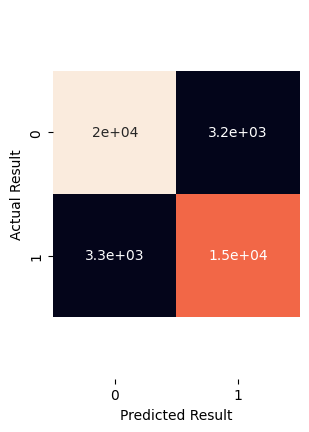

In [ ]:
mat = confusion_matrix(y_test,pred) #the first value given here will show up on the y-axis
sns.heatmap (mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim()
a += 0.5
b -= 0.5
plt.ylim(a, b)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     23438
           1       0.82      0.82      0.82     18124

    accuracy                           0.84     41562
   macro avg       0.84      0.84      0.84     41562
weighted avg       0.84      0.84      0.84     41562



In [ ]:
pred_train = logmodel.predict(X_train)
accuracy_score(y_train,pred_train)

0.8398511436912515

In [ ]:
pred_test = logmodel.predict(X_test)
accuracy_score(y_test,pred_test)

0.8425003609065974

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [ ]:
print(result.summary())

                             Logit Regression Results                             
Dep. Variable:     satisfaction_satisfied   No. Observations:                62342
Model:                              Logit   Df Residuals:                    62322
Method:                               MLE   Df Model:                           19
Date:                    Mon, 08 May 2023   Pseudo R-squ.:                     inf
Time:                            01:41:34   Log-Likelihood:                   -inf
converged:                           True   LL-Null:                        0.0000
Covariance Type:                nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.6565      0.079    -58.928      0.000      -4.811      -4.502
Age                           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# Remove variables with high p-value
x_train = X_train.drop(['purpose_of_travel_aviation','purpose_of_travel_personal',
                       'purpose_of_travel_tourism','purpose_of_travel_business'], axis=1)
x_train = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train)
result1 = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [ ]:
print(result1.summary())

                             Logit Regression Results                             
Dep. Variable:     satisfaction_satisfied   No. Observations:                62342
Model:                              Logit   Df Residuals:                    62326
Method:                               MLE   Df Model:                           15
Date:                    Mon, 08 May 2023   Pseudo R-squ.:                     inf
Time:                            01:41:39   Log-Likelihood:                   -inf
converged:                           True   LL-Null:                        0.0000
Covariance Type:                nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.6625      0.077    -60.890      0.000      -4.813      -4.512
Age                           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
satisfaction.corr()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,satisfaction_satisfied
Age,1.000000,0.017859,0.038125,0.024842,-0.001330,0.023000,0.160277,0.076444,0.035482,-0.049427,0.053611,0.008928,-0.000776,0.001020,-0.000916,0.003958,-0.048524,-0.132551,-0.013376,0.137167
Hotel wifi service,0.017859,1.000000,0.343845,0.715856,0.336248,0.134718,0.122658,0.209321,0.043193,0.110441,0.132698,0.008974,-0.002243,0.000701,0.000351,-0.000746,-0.105085,-0.037197,0.008034,0.284245
Departure/Arrival convenience,0.038125,0.343845,1.000000,0.436961,0.444757,0.004906,0.011344,-0.004861,0.093333,0.073318,0.014292,0.009142,-0.001873,-0.001198,-0.000736,-0.000405,0.259763,0.082321,0.028740,-0.051601
Ease of Online booking,0.024842,0.715856,0.436961,1.000000,0.458655,0.031873,0.030014,0.047032,0.011081,0.035272,0.016179,0.006951,0.002772,-0.007030,0.000979,-0.001131,-0.133511,-0.098039,-0.018914,0.171705
Hotel location,-0.001330,0.336248,0.444757,0.458655,1.000000,-0.001159,0.003669,0.003517,-0.035427,0.001681,-0.003830,0.000333,-0.001483,-0.006539,0.000514,-0.000457,-0.030700,-0.003488,-0.002031,0.000682
Food and drink,0.023000,0.134718,0.004906,0.031873,-0.001159,1.000000,0.574556,0.622512,0.087299,0.033993,0.657760,0.005772,-0.005339,0.004527,-0.002805,-0.001345,-0.063439,-0.078801,-0.016671,0.209936
Stay comfort,0.160277,0.122658,0.011344,0.030014,0.003669,0.574556,1.000000,0.610590,0.191854,0.069218,0.678534,-0.026502,-0.004355,0.005611,-0.000767,-0.003870,-0.124399,-0.206054,-0.054034,0.349459
Common Room entertainment,0.076444,0.209321,-0.004861,0.047032,0.003517,0.622512,0.610590,1.000000,0.120867,0.404855,0.691815,0.006117,-0.005227,0.006292,0.000683,-0.005347,-0.148199,-0.176323,-0.045271,0.398059
Checkin/Checkout service,0.035482,0.043193,0.093333,0.011081,-0.035427,0.087299,0.191854,0.120867,1.000000,0.237197,0.179583,0.010563,-0.001303,0.000839,0.001412,-0.004783,0.016751,-0.130274,-0.063251,0.236174
Other service,-0.049427,0.110441,0.073318,0.035272,0.001681,0.033993,0.069218,0.404855,0.237197,1.000000,0.088779,0.039410,-0.004706,0.003869,0.006240,-0.007083,-0.022599,-0.135770,-0.059757,0.244741


In [ ]:
satisfied = satisfaction['satisfaction_satisfied']
satisfied

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction_satisfied, Length: 103904, dtype: uint8

In [ ]:
satisfaction = satisfaction.drop(['satisfaction_satisfied'], axis=1)

In [ ]:
X = satisfaction
y=satisfied
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1555)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model object
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, max_features='sqrt', random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [ ]:
importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance'])
importances.sort_values('importance', ascending=False, inplace=True)
print(importances.head(10))

                                   importance
Type Of Booking_Individual/Couple    0.199973
Type of Travel_Personal Travel       0.196314
Hotel wifi service                   0.155213
Common Room entertainment            0.137650
Stay comfort                         0.098105
Cleanliness                          0.053135
Other service                        0.044518
Ease of Online booking               0.039153
Checkin/Checkout service             0.028582
Age                                  0.016346


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.893989702131755


In [ ]:
 from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score

rf_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate and print accuracy rate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy rate:", accuracy.round(4))

# Calculate and print sensitivity rate
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity rate:", sensitivity.round(4))

# Calculate and print specificity rate
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity rate:", specificity.round(4))

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision.round(4))

# Calculate and print balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy:", balanced_accuracy.round(4))

Confusion matrix:
[[21496  1942]
 [ 2464 15660]]
Accuracy rate: 0.894
Sensitivity rate: 0.864
Specificity rate: 0.9171
Precision: 0.8897
Balanced accuracy: 0.8906


#**Statistical Testing**



In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
promo_pics = pd.read_csv('promo_pics(1).csv')

In [ ]:
promo_pics

,recipient,pic_seen,site_duration,spend,register
0,1,Sunset,18.20,16.60,0
1,2,Main St,28.61,15.30,0
2,3,Waterslide,10.90,16.32,1
3,4,Waterslide,11.30,22.62,0
4,5,Sunset,19.70,17.30,0
...,...,...,...,...,...
3395,3396,Waterslide,11.80,19.12,1
3396,3397,Main St,23.61,16.80,0
3397,3398,Waterslide,10.90,18.82,1
3398,3399,Main St,14.71,20.50,0


In [ ]:
# Create a formula to model the register column with pic_seen as the predictor variable
formula = 'register ~ C(pic_seen)'

In [ ]:
# Fit an ANOVA model using the formula
model = ols(formula, data=promo_pics).fit()

In [ ]:
# Print the ANOVA table
table = sm.stats.anova_lm(model, typ=2)

In [ ]:
table

,sum_sq,df,F,PR(>F)
C(pic_seen),6.855808,2.0,14.721082,4.307863e-07
Residual,791.014486,3397.0,NaN,NaN


The ANOVA table shows that the model has a significant effect on the register column based on the pic_seen predictor variable, with a p-value of 4.307863e-07, which is less than the conventional significance level of 0.05. This suggests that the mean register values for the different picture types are different, and that pic_seen is a significant predictor of register.

In [ ]:
# Compute CTR for each picture
ctr = promo_pics.groupby('pic_seen')['register'].mean()

In [ ]:
ctr

pic_seen
Main St       0.341463
Sunset        0.440541
Waterslide    0.348511
Name: register, dtype: float64

In [ ]:
# Compute the cost per conversion for each picture
cost_per_conversion = promo_pics.groupby('pic_seen')['spend'].sum() / promo_pics.groupby('pic_seen')['register'].sum()

In [ ]:
cost_per_conversion

pic_seen
Main St       41.047704
Sunset        38.093865
Waterslide    53.389296
dtype: float64

In [ ]:
# Compute the demographic profile of the target audience for each picture
demographics = promo_pics.groupby('pic_seen').agg({'recipient': 'nunique', 'site_duration': 'mean'})

In [ ]:
demographics

,recipient,site_duration
pic_seen,,
Main St,1148,24.294059
Sunset,1110,22.949189
Waterslide,1142,10.975394


In conclusion, sunset is the best picture going forward because based on the results we obtained from the ANOVA analysis, it can the sunset picture type has a significant effect on the registration rates. The cost per conversion and the demographic profile of the target audience were also computed for each picture type.